PROYECTO 5: P. DENNIS RODRÍGUEZ TOVAR

DAPT - ABRIL 2022

In [62]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from scipy.stats import ttest_1samp
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
df = pd.read_csv(r'C:\Users\denni\train.csv')

### 1. Exploración de los datos

    En esta sección, se trabajó la revisión de las columnas, los valores de los datos, así como la eliminación de nulos. 

In [2]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
df.shape

(1460, 81)

In [4]:
df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [5]:
df.drop(['Id'], axis=1, inplace=True)

In [6]:
percent_missing = df.isnull().sum() * 100 / len(df)
missing_value_df = pd.DataFrame({'column_name': df.columns,
                                 'percent_missing': percent_missing})
missing_value_df.sort_values('percent_missing', inplace=True, ascending=[False])
missing_value_df

,column_name,percent_missing
PoolQC,PoolQC,99.520548
MiscFeature,MiscFeature,96.301370
Alley,Alley,93.767123
Fence,Fence,80.753425
FireplaceQu,FireplaceQu,47.260274
...,...,...
Heating,Heating,0.000000
HeatingQC,HeatingQC,0.000000
MSZoning,MSZoning,0.000000
1stFlrSF,1stFlrSF,0.000000


In [7]:
col_drop=missing_value_df[missing_value_df.percent_missing >15 ].index
col_drop

Index(['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'FireplaceQu',
       'LotFrontage'],
      dtype='object')

In [8]:
df.drop(col_drop, axis=1, inplace=True)

In [9]:
df.shape

(1460, 74)

In [10]:
nulos = df.isnull().sum() 
nulos_df= pd.DataFrame({'column_name': df.columns,
                                 'suma_nulos': nulos})
nulos_df.sort_values('suma_nulos', inplace=True, ascending=[False])
nulos_df

,column_name,suma_nulos
GarageType,GarageType,81
GarageYrBlt,GarageYrBlt,81
GarageFinish,GarageFinish,81
GarageQual,GarageQual,81
GarageCond,GarageCond,81
...,...,...
BsmtUnfSF,BsmtUnfSF,0
TotalBsmtSF,TotalBsmtSF,0
Heating,Heating,0
MSZoning,MSZoning,0


In [11]:
df= df.dropna()

In [12]:
df.shape

(1338, 74)

### 2. Evaluación de variables no numéricas

    Revisión de las variables no numéricas, para conocer su influencia en los precios promedio de las casas.

In [13]:
no_numericas = df.select_dtypes(include = ["object"])
no_numericas.columns

Index(['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond',
       'PavedDrive', 'SaleType', 'SaleCondition'],
      dtype='object')

In [14]:
no_numericas.head(5).T

,0,1,2,3,4
MSZoning,RL,RL,RL,RL,RL
Street,Pave,Pave,Pave,Pave,Pave
LotShape,Reg,Reg,IR1,IR1,IR1
LandContour,Lvl,Lvl,Lvl,Lvl,Lvl
Utilities,AllPub,AllPub,AllPub,AllPub,AllPub
LotConfig,Inside,FR2,Inside,Corner,FR2
LandSlope,Gtl,Gtl,Gtl,Gtl,Gtl
Neighborhood,CollgCr,Veenker,CollgCr,Crawfor,NoRidge
Condition1,Norm,Feedr,Norm,Norm,Norm
Condition2,Norm,Norm,Norm,Norm,Norm


In [15]:
df_categories= df[['SalePrice','LotShape', 'Neighborhood', 'Condition1', 'BldgType', 'Foundation','Heating','Electrical','GarageType','SaleType', 'SaleCondition']]

In [16]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [17]:
model = ols('SalePrice ~ LotShape + Neighborhood + Condition1+ BldgType+Foundation+Heating+Electrical+GarageType+SaleType+SaleCondition', data=df_categories).fit()
anova_table = sm.stats.anova_lm(model)
anova_table.sort_values(by=['PR(>F)']) 

,df,sum_sq,mean_sq,F,PR(>F)
Neighborhood,24.0,3.851126e+12,1.604636e+11,67.213816,2.897000e-206
LotShape,3.0,6.176728e+11,2.058909e+11,86.242104,8.699290e-51
BldgType,4.0,3.146794e+11,7.866985e+10,32.952654,3.563455e-26
Foundation,4.0,1.693349e+11,4.233372e+10,17.732442,3.562604e-14
GarageType,5.0,1.378166e+11,2.756332e+10,11.545521,6.351807e-11
SaleType,8.0,8.849654e+10,1.106207e+10,4.633599,1.349472e-05
Condition1,8.0,5.034906e+10,6.293633e+09,2.636231,7.238660e-03
Heating,3.0,2.308967e+10,7.696558e+09,3.223878,2.190012e-02
Electrical,4.0,2.533431e+10,6.333578e+09,2.652963,3.176542e-02
SaleCondition,5.0,1.856873e+10,3.713746e+09,1.555587,1.697691e-01


    Las variables que se eligieron para realizar el análisis por ANOVA, se seleccionaron por ser variables que podían no tener alguna relación con las variables numéricas y parecían generalizar el estado de las casas, por lo tanto a partir de los resultados obtenidos en el ANOVA, podemos concluir que dichas variables tienen influencia en el costo promedio de las casas, principalmente en el caso del vecindario donde se ubican.


### 3. Distribución de los datos 
     En esta sección se trabajo en la visualización de los datos, así como en la normalización de la distribución.

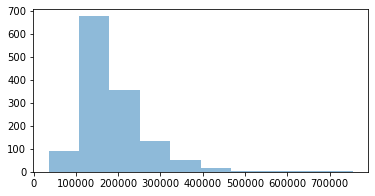

In [18]:
plt.figure(figsize = (6, 3))
plt.hist(df['SalePrice'], alpha=0.5)
plt.show()

    Se le realizó un log a la columna del precio de venta, el resultado se muestra a continuación:

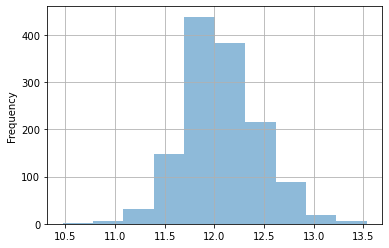

In [19]:
import math
df['SalePriceAdjusted'] = df['SalePrice'].apply(math.log)
df['SalePriceAdjusted'].plot.hist(alpha=0.5, grid=True, legend=None)
plt.show()

#### 4. Visualización y agrupación de datos
    Para la siguiente sección, se observan alguna de las primeras visualizaciones a través de diagramas de dispersión para mostrar los valores de dos variables que tuvieron algunos cambios para poder utilizarse posteriormente en la correlación.

    Se agruparon las habitaciones totales de la casa, con el fin de reducir el número de columnas del DataFrame

In [20]:
df["Total_Rooms"]=df[['BedroomAbvGr', 'KitchenAbvGr', 'FullBath', 'HalfBath', 'BsmtFullBath', 'BsmtHalfBath']].sum(axis=1)
df.columns

Index(['MSSubClass', 'MSZoning', 'LotArea', 'Street', 'LotShape',
       'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood',
       'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl',
       'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterQual',
       'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure',
       'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF',
       'TotalBsmtSF', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical',
       '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath',
       'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr',
       'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorc

<AxesSubplot:xlabel='Total_Rooms', ylabel='SalePrice'>

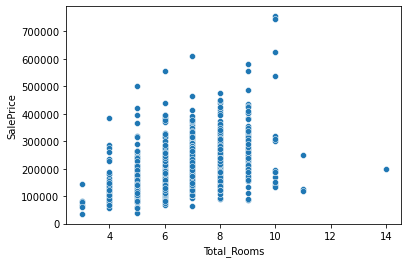

In [21]:
sns.scatterplot(x = 'Total_Rooms', y = 'SalePrice', data = df, palette="Blues_d")

    Para las varibales con el año, se realizó un cálculo para en su lugar, tomar el tiempo de diferencia entre las fechas y el año actual con el mismo fin inicial.

In [22]:
df['TimeBuilt']= 2022- df['YearBuilt']
df['TimeBuilt'].head()

0     19
1     46
2     21
3    107
4     22
Name: TimeBuilt, dtype: int64

<AxesSubplot:xlabel='TimeBuilt', ylabel='SalePrice'>

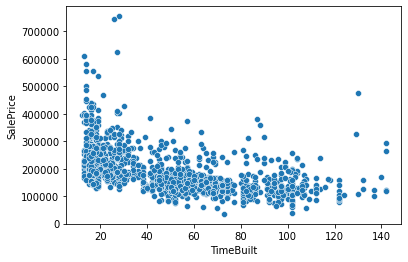

In [23]:
sns.scatterplot(x = 'TimeBuilt', y = 'SalePrice', data = df, palette="Blues_d")

In [24]:
df['TimeRemo']= 2022- df['YearRemodAdd']
df['TimeRemo'].head()

0    19
1    46
2    20
3    52
4    22
Name: TimeRemo, dtype: int64

<AxesSubplot:xlabel='TimeRemo', ylabel='SalePrice'>

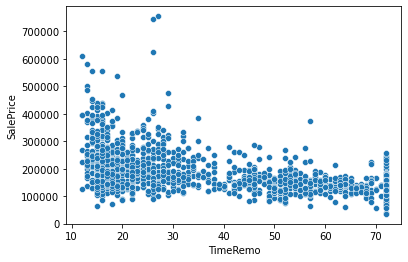

In [25]:
sns.scatterplot(x = 'TimeRemo', y = 'SalePrice', data = df, palette="Blues_d")

#### 5. Tabla de correlación
    A continuación se puede observar la tabla de correlación y la selección de las variables con mayor correlación (positiva y negativa) respecto al precio de venta.

In [26]:
numerical= df.select_dtypes(include=['number'])
corr= numerical.corr()
mask = np.triu(np.ones_like(corr, dtype = bool))

In [27]:
cmap = sns.diverging_palette(2020, 10, as_cmap = True) 

<AxesSubplot:>

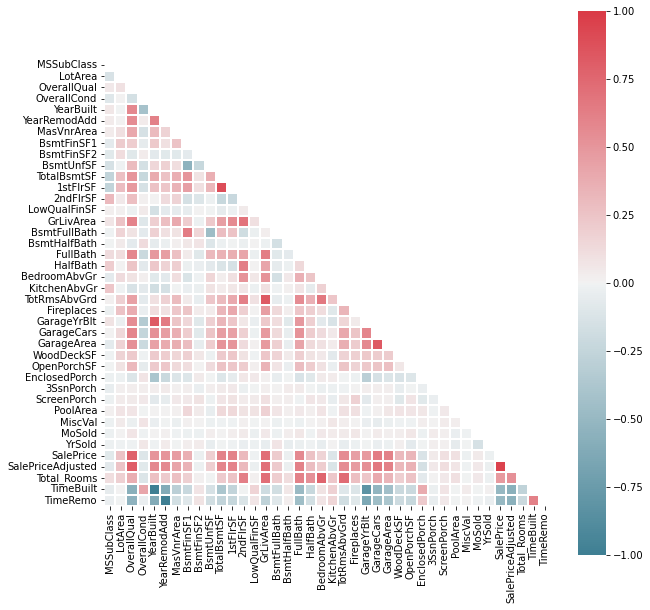

In [28]:
plt.figure(figsize = (10,10))
sns.heatmap(corr, mask=mask,cmap = cmap, vmax = 1, vmin = -1, annot = False, square = True, center = 0, linewidths = 0.3, )

In [29]:
df_corr= df.corr()

In [30]:
sales= df_corr['SalePrice'].sort_values(ascending=False)
df_sales=pd.DataFrame(sales)

In [31]:
positive_corr=df_sales[(df_sales['SalePrice'] > 0.50) & (df_sales['SalePrice']<1)]
positive_corr

,SalePrice
SalePriceAdjusted,0.954241
OverallQual,0.783546
GrLivArea,0.711706
GarageCars,0.640154
GarageArea,0.607535
1stFlrSF,0.604714
TotalBsmtSF,0.602042
FullBath,0.569313
TotRmsAbvGrd,0.551821
YearBuilt,0.504297


In [32]:
negative_corr=df_sales[(df_sales['SalePrice'] < (-0.50)) & (df_sales['SalePrice'] > (-1))]
negative_corr

,SalePrice
TimeRemo,-0.501435
TimeBuilt,-0.504297


In [33]:
df_select= df[['SalePrice','SalePriceAdjusted','OverallQual','GrLivArea', 'GarageCars', 'GarageArea', '1stFlrSF','TotalBsmtSF', 'FullBath', 'TotRmsAbvGrd','TimeRemo', 'TimeBuilt',
             'LotShape', 'Neighborhood','BldgType','Foundation','GarageType']]
df_select.head()

,SalePrice,SalePriceAdjusted,OverallQual,GrLivArea,GarageCars,GarageArea,1stFlrSF,TotalBsmtSF,FullBath,TotRmsAbvGrd,TimeRemo,TimeBuilt,LotShape,Neighborhood,BldgType,Foundation,GarageType
0,208500,12.247694,7,1710,2,548,856,856,2,8,19,19,Reg,CollgCr,1Fam,PConc,Attchd
1,181500,12.109011,6,1262,2,460,1262,1262,2,6,46,46,Reg,Veenker,1Fam,CBlock,Attchd
2,223500,12.317167,7,1786,2,608,920,920,2,6,20,21,IR1,CollgCr,1Fam,PConc,Attchd
3,140000,11.849398,7,1717,3,642,961,756,1,7,52,107,IR1,Crawfor,1Fam,BrkTil,Detchd
4,250000,12.429216,8,2198,3,836,1145,1145,2,9,22,22,IR1,NoRidge,1Fam,PConc,Attchd


#### 6. Prueba de Hipótesis
    Se llevo a cabo una prueba de hipótesis con los datos, de manera que se pudieran evaluar las hipótesos nula y confirmar el comportamiento de nuestros datos. 

$$H_0 = \text{El tipo de viviendas unifamiliares tiene en promedio un tiempo de remodelación de 40 años}$$

In [34]:
df_select.BldgType.value_counts()

1Fam      1138
TwnhsE     112
Twnhs       38
Duplex      28
2fmCon      22
Name: BldgType, dtype: int64

In [35]:
df_type= df_select[df_select['BldgType']== "1Fam"]

In [36]:
stats.ttest_1samp(df_type['TimeRemo'],40)

Ttest_1sampResult(statistic=-5.353675982213851, pvalue=1.0421165706258885e-07)

#### Resultado: 
A partir de los resultados, podemos rechazar la hipótesis nula con una confianza del 99%.

$$H_0 = \text{El sistema de electricidad de Interruptores automáticos estándar y RomexLos (SBrkr) tienen un precio promedio de 250000 USD }$$

In [37]:
df_electrical= df[df['Electrical']== "SBrkr"]

In [38]:
stats.ttest_1samp(df_electrical['SalePrice'],250_000)

Ttest_1sampResult(statistic=-25.96372858104104, pvalue=4.618584973873539e-119)

#### Resultado: 
A partir de los resultados, podemos rechazar la hipótesis nula con una confianza del 99%.

#### 7. Visualización de las variables correlacionadas
    Se realizó la visualización de las variables que mostraron alta correlación con el precio de venta, utilizando el precio ajustado y de esta manera considerarlas en el objetivo final, el modelo de regresión.

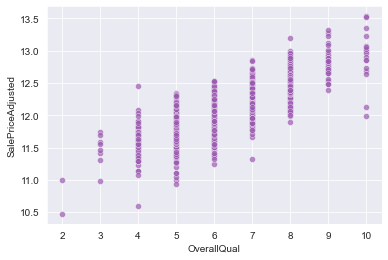

In [39]:
sns.set_style("darkgrid")
sns.scatterplot(x = 'OverallQual', y = 'SalePriceAdjusted', data = df_select, color="#9b59b0", alpha = 0.7)
plt.show()

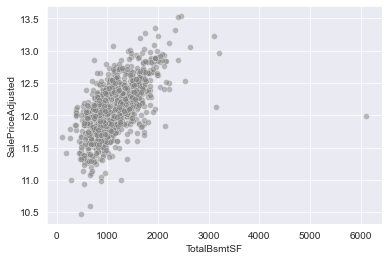

In [40]:
sns.set_style("darkgrid")
sns.scatterplot(x = 'TotalBsmtSF', y = 'SalePriceAdjusted', data = df_select, color="grey", alpha = 0.5)
plt.show()

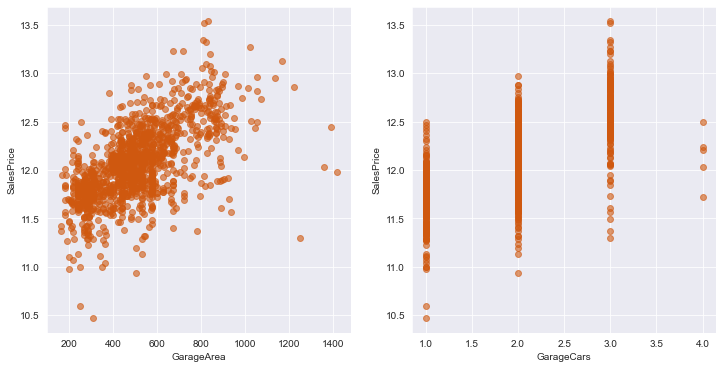

In [41]:
cols=['GarageArea','GarageCars', 'SalePriceAdjusted']
df_plot =df_select[cols]
fig,axes = plt.subplots(figsize = (12,6), nrows = 1, ncols = 2)
for i in range(2):
    plt.sca(axes[i])
    plt.scatter(df_plot.iloc[:,i],df['SalePriceAdjusted'], color="#cf580f", alpha = 0.6)
    plt.xlabel(df_plot.iloc[:,i].name)
    plt.ylabel('SalesPrice')

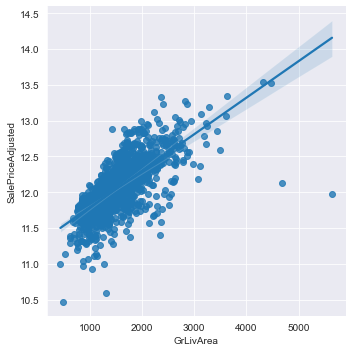

In [42]:
sns.lmplot(x='GrLivArea',y='SalePriceAdjusted', data=df_select ,fit_reg=True) 
plt.show()

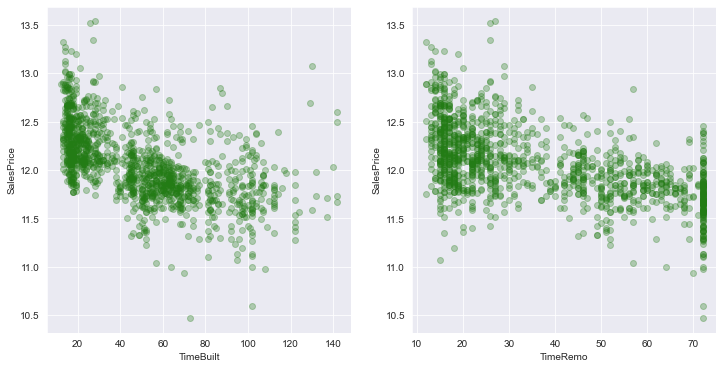

In [43]:
cols=['TimeBuilt', "TimeRemo", 'SalePriceAdjusted']
df_time=df_select[cols]
fig,axes = plt.subplots(figsize = (12,6), nrows = 1, ncols = 2)
for i in range(2):
    plt.sca(axes[i])
    plt.scatter(df_time.iloc[:,i],df['SalePriceAdjusted'], color='#237c15', alpha = 0.3)
    plt.xlabel(df_time.iloc[:,i].name)
    plt.ylabel('SalesPrice')

#### 8. Modelo de regresión:
    Para este caso se utilizó el modelo de regresión de la librería statsmodel, a partir de las columnas con mejores resultados en la tabla de correlación, así como de la visualización

In [44]:
Y= df_select['SalePrice']

In [57]:
X=sm.add_constant(df_select['OverallQual'])
modelo_ventas = sm.OLS(Y, X).fit()
predictions = modelo_ventas.predict(X)
print_model= modelo_ventas.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.614
Model:                            OLS   Adj. R-squared:                  0.614
Method:                 Least Squares   F-statistic:                     2125.
Date:                Sun, 31 Jul 2022   Prob (F-statistic):          2.12e-278
Time:                        21:14:41   Log-Likelihood:                -16349.
No. Observations:                1338   AIC:                         3.270e+04
Df Residuals:                    1336   BIC:                         3.271e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -1.036e+05   6440.614    -16.086      

##### Prueba del modelo

In [60]:
predictions

0       223188.430852
1       176503.703381
2       223188.430852
3       223188.430852
4       269873.158324
            ...      
1455    176503.703381
1456    176503.703381
1457    223188.430852
1458    129818.975909
1459    129818.975909
Length: 1338, dtype: float64

In [99]:
df_p=df_select[['OverallQual', 'SalePrice']]
df_p["prediccion"]= round(predictions)
df_p

C:\Users\denni\AppData\Local\Temp/ipykernel_10324/3288408767.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_p["prediccion"]= round(predictions)


,OverallQual,SalePrice,prediccion
0,7,208500,223188.0
1,6,181500,176504.0
2,7,223500,223188.0
3,7,140000,223188.0
4,8,250000,269873.0
...,...,...,...
1455,6,175000,176504.0
1456,6,210000,176504.0
1457,7,266500,223188.0
1458,5,142125,129819.0


##### Modelo con más de una variable

In [103]:
X2=sm.add_constant(df_select[['OverallQual', 'GarageCars', 'GarageArea', '1stFlrSF','TotalBsmtSF', 'TotRmsAbvGrd','TimeRemo', 'TimeBuilt']])
modelo_ventas2 = sm.OLS(Y, X2).fit()
predictions2 = modelo_ventas2.predict(X2)
print_model2= modelo_ventas2.summary()

print(print_model2)

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.743
Model:                            OLS   Adj. R-squared:                  0.741
Method:                 Least Squares   F-statistic:                     479.0
Date:                Sun, 31 Jul 2022   Prob (F-statistic):               0.00
Time:                        21:48:19   Log-Likelihood:                -16078.
No. Observations:                1338   AIC:                         3.217e+04
Df Residuals:                    1329   BIC:                         3.222e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const        -1.062e+05   8948.846    -11.868   

C:\Users\denni\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [102]:
df_pd=df_select[['OverallQual', 'SalePrice']]
df_pd["prediccion"]= round(predictions)
df_pd

C:\Users\denni\AppData\Local\Temp/ipykernel_10324/3785986669.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pd["prediccion"]= round(predictions)


,OverallQual,SalePrice,prediccion
0,7,208500,223188.0
1,6,181500,176504.0
2,7,223500,223188.0
3,7,140000,223188.0
4,8,250000,269873.0
...,...,...,...
1455,6,175000,176504.0
1456,6,210000,176504.0
1457,7,266500,223188.0
1458,5,142125,129819.0


#### CONCLUSIONES: 

    DURANTE EL DESARROLLO DEL PROYECTO, PUDIMOS OBSERVAR QUE PUEDEN EXISTIR DIFERENTES VARIABLES QUE NOS AYUDEN A PREDECIR UN VALOR, A PARTIR DE EVALUAR SU CORRELACIÓN CON LOS MISMOS, PERSONALMENTE ME PARECIÓ UN TEMA COMPLEJO, PRINCIPALMENTE EN LA APLCACIÓN DE LAS PREDICCIONES, COMO SE OBSERVA EN LAS ÚLTIMAS PARTES DEL PROYECTO, HUBO ALGUNAS FALLAS EN EL TRATAMIENTO DE LOS DATOS, SIN EMBARGO, FUE POSIBLE OBSERVAR LA DIFERENCIA ENTREN LOS VALORES ORIGINALES Y LOS PREDECIDOS EN EL MODELO.
     
    POR LO QUE LOS VALORES NUMÉRICOS QUE MÁS INFLUYEN EN EL PRECIO DE LAS CASAS, SON AQUELLOS RELACIONADOS CON LA CALIDAD, EL ÁREA, EL NÚMERO DE HABITACIONES Y LA ANTIGUEDAD DE CONSTRUCCIÓN Y REMODELACIÓN.
     
    COMO SIGUIENTES PASOS, PODRÍAMOS REALIZAR LA REVISIÓN CON LAS VARIABLES CUALITATIVAS PARA REFORZAR EL MODELO Y PODER OBTENER VALORES DE PREDICCIÓN MÁS CERCANOS.

    